#### Importamos librerías necesarias

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [38]:
# Eliminamos todos los warnings
warnings.filterwarnings("ignore")

In [1]:
encoding = 'utf-8'
path = 'data/tweets.json'

#### Lectura de Tweets.JSON

In [4]:
df = pd.read_json(path_or_buf=path, encoding=encoding)

Verificamos el contenido

In [6]:
df.head(3)

,id,texto,usuario,hashtags,fecha,retweets,favoritos
0,1,La tecnología de la realidad virtual está revo...,gamers_unidos,"[tecnología, videojuegos]",2023-03-13 16:45:00,23,87
1,2,Apple anuncia el lanzamiento de su nuevo iPhon...,tech_news,"[Apple, iPhone15]",2023-03-12 10:30:00,234,1876
2,3,Google presenta su nuevo asistente virtual con...,tech_guru,"[Google, hogarinteligente]",2023-03-11 15:20:00,78,489


#### TIPOS DE DATOS

In [12]:
df.dtypes

id            int64
texto        object
usuario      object
hashtags     object
fecha        object
retweets      int64
favoritos     int64
dtype: object

#### CALIDAD DE DATOS

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25 non-null     int64 
 1   texto      25 non-null     object
 2   usuario    25 non-null     object
 3   hashtags   25 non-null     object
 4   fecha      25 non-null     object
 5   retweets   25 non-null     int64 
 6   favoritos  25 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.5+ KB


In [20]:
print(f'Total de columnas -> {df.shape[1]}')
print(f'Total de filas -> {df.shape[0]}')
print(f'Cantidad de valore nulos por columna:')
print(df.isnull().sum(axis=0))

Total de columnas -> 7
Total de filas -> 25
Cantidad de valore nulos por columna:
id           0
texto        0
usuario      0
hashtags     0
fecha        0
retweets     0
favoritos    0
dtype: int64


Vemos que la calidad de nuestros datos es buena, ya que no tenemos datos nulos. <br> <br>

Sin embargo, existen transformaciones que nos permitirán:
- Analizar mejor los datos.
- Preparar los datos para su futura ingesta en una Base de Datos Relacional.

#### TRANSFORMACIONES

Observamos nuestro DataFrame nuevamente...

In [25]:
df.head(3)

,id,texto,usuario,hashtags,fecha,retweets,favoritos
0,1,La tecnología de la realidad virtual está revo...,gamers_unidos,"[tecnología, videojuegos]",2023-03-13 16:45:00,23,87
1,2,Apple anuncia el lanzamiento de su nuevo iPhon...,tech_news,"[Apple, iPhone15]",2023-03-12 10:30:00,234,1876
2,3,Google presenta su nuevo asistente virtual con...,tech_guru,"[Google, hogarinteligente]",2023-03-11 15:20:00,78,489


Procedemos a desanidar la columna "hashtags", ya que es un campo multivaluado

In [26]:
df = df.explode(column='hashtags')

Sería mejor tener fecha y hora en columnas separadas

In [28]:
df[['fecha', 'hora']] = df['fecha'].str.split(' ', expand=True)

Ahora podemos analizar estadísticas y tendencias en los datos utilizando gráficos

#### ENTENDIENDO LAS TENDENCIAS

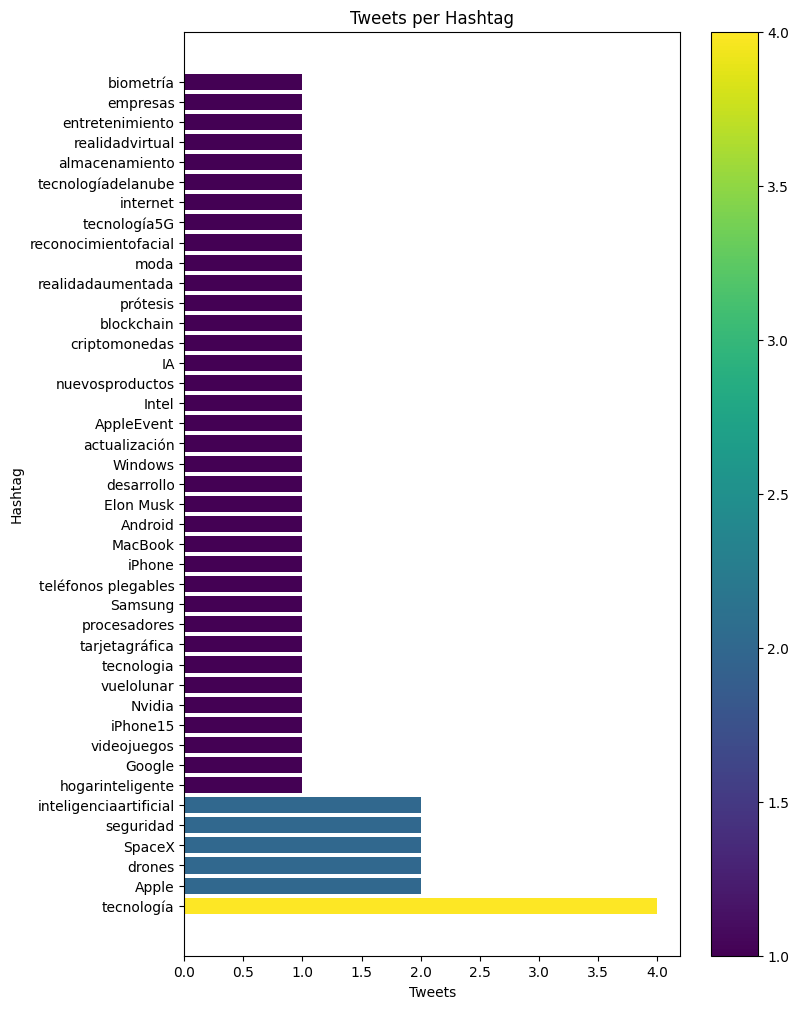

In [39]:
fig, ax = plt.subplots(figsize=(8, 12))

# Contamos la ocurrencia de tweets por hashtag
data = df['hashtags'].value_counts()

# Obtenemos X e Y. Pero los intercambiamos para un gráfico horizontal
hashtags = data.index
tweet_count = data.values

# Simplemente para obtener distintos colores de barras
cmap = plt.get_cmap('viridis') 
normalize = plt.Normalize(vmin=min(tweet_count), vmax=max(tweet_count))

# Creamos el gráfico de barras horizontal con los colores generados
bars = ax.barh(hashtags, tweet_count, color=cmap(normalize(tweet_count)))

# Añadimos una barra de colores de referencia (a la derecha)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)

# Seteamos título y etiquetas
ax.set_title('Tweets per Hashtag')
ax.set_xlabel('Tweets')
ax.set_ylabel('Hashtag')

plt.show()

- A simple vista, podemos decir que los tweets que más se repiten son de "Tecnología".
- Aunque los tweets le siguen en frecuencia están fuertemente vinculados a la tecnología. (Inteligencia Artificial, cómo no...)